In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# Merge all datasets onto one and explore final shape and size.
ca = pd.read_json('Car-Attributes.json')
ca1 = pd.read_csv('Car name.csv')
df1 = pd.concat([ca,ca1],axis=1)
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Final Shape of the merged dataset

row, column = df1.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 398 rows and 9 columns


In [4]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

df1.to_csv('mpg.csv', index=False)
df1.to_excel('mpg.xlsx', index = False)
df1.to_json('mpg.json', orient = 'split', compression = 'infer', index = 'true')

In [5]:
# Import the data from above steps.

car = pd.read_csv('mpg.csv')
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
# Get the 5-point summary of numerical features
summary = car.select_dtypes(include=['number']).describe()
print(summary)

# Display insights
for column in summary.columns:
    print(f"\nColumn: {column}")
    print(f"Mean: {summary[column]['mean']}")
    print(f"Standard Deviation: {summary[column]['std']}")
    print(f"Min: {summary[column]['min']}")
    print(f"25th Percentile: {summary[column]['25%']}")
    print(f"Median (50th Percentile): {summary[column]['50%']}")
    print(f"75th Percentile: {summary[column]['75%']}")
    print(f"Max: {summary[column]['max']}")

              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  

Column: mpg
Mean: 23.514572864321607
Standard Deviation: 7.815984312565782
Min: 

              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


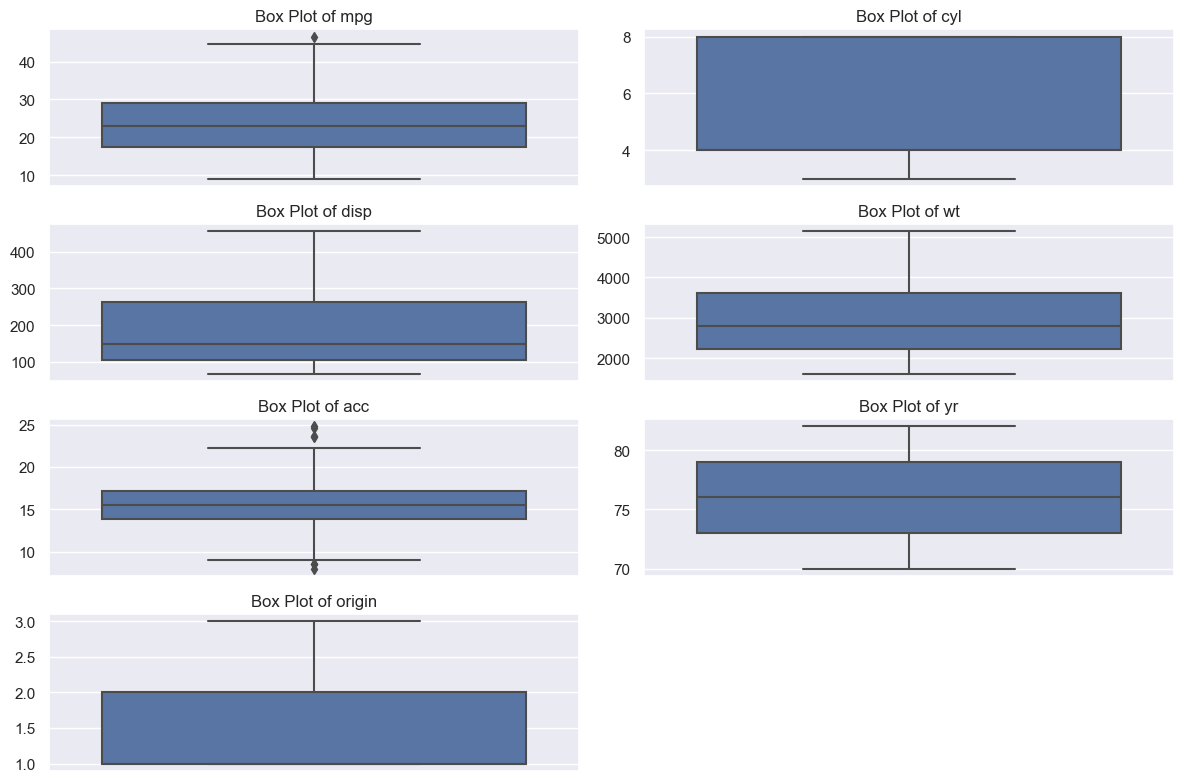

In [12]:
# Get the 5-point summary of numerical features
summary = car.describe()

# Display the 5-point summary
print(summary)

# Visualize the 5-point summary using box plots for numeric columns only
numeric_columns = car.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=car[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### Insights

Fuel Efficiency (mpg):
Average fuel efficiency is approximately 23.5 mpg.
There is a wide range of mpg values from 9.0 to 46.6, indicating significant variation in fuel efficiency among the vehicles.

Number of Cylinders (cyl):
Most vehicles have either 4 or 8 cylinders, showing a bimodal distribution.
The average number of cylinders is about 5.45.

Engine Displacement (disp):
The average engine displacement is around 193.43 cubic inches.
Engine sizes vary widely, from 68.0 to 455.0 cubic inches.

Vehicle Weight (wt):
The average vehicle weight is approximately 2970.42 pounds.
Vehicle weights range significantly, from 1613 to 5140 pounds.

Acceleration (acc):
Average acceleration time (0-60 mph) is about 15.57 seconds.
Acceleration times vary from 8.0 to 24.8 seconds, indicating a mix of both fast and slow vehicles.

Model Year (yr):
Vehicles span model years from 1970 to 1982, with an average model year around 1976.

Origin:
The majority of vehicles are of American origin, with some representation from European and Asian origins.

In [16]:
# Missing/incorrect value treatment

# Dropping car name, as that is of least importance.

car = car.drop('car_name', axis=1)
# Also replacing the categorical var with actual values
car['origin'] = car['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [17]:

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [18]:

car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [19]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car.hp.str.isdigit()) 

#print isDigit = False!
car[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


There are various ways to handle missing values. 
Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations. Here, we will replace them with their median values. First replace '?' with NaN and then replace NaN with median

In [20]:
# Replace missing values with NaN
car = car.replace('?', np.nan)
car[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [ ]:
car.median()

In [22]:
car['hp'].fillna((car['hp'].median()), inplace=True)
car['hp'] = car.hp.astype(float)

In [23]:
print('The data set has no missing values \n')
car.isnull().sum()

The data set has no missing values 



mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [24]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
car['mpg_level'] = car['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,america,medium
1,15.0,8,350.0,165.0,3693,11.5,70,america,low
2,18.0,8,318.0,150.0,3436,11.0,70,america,medium
3,16.0,8,304.0,150.0,3433,12.0,70,america,low
4,17.0,8,302.0,140.0,3449,10.5,70,america,medium


In [25]:
#categorical variable
car_cat = car.iloc[:,[1,6,7,8]]
car_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,america,medium
1,8,70,america,low
2,8,70,america,medium
3,8,70,america,low
4,8,70,america,medium


In [26]:
#numeric variables
car_num=car.drop(['cyl','yr','origin','mpg_level'],axis=1)
car_num.head()

,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


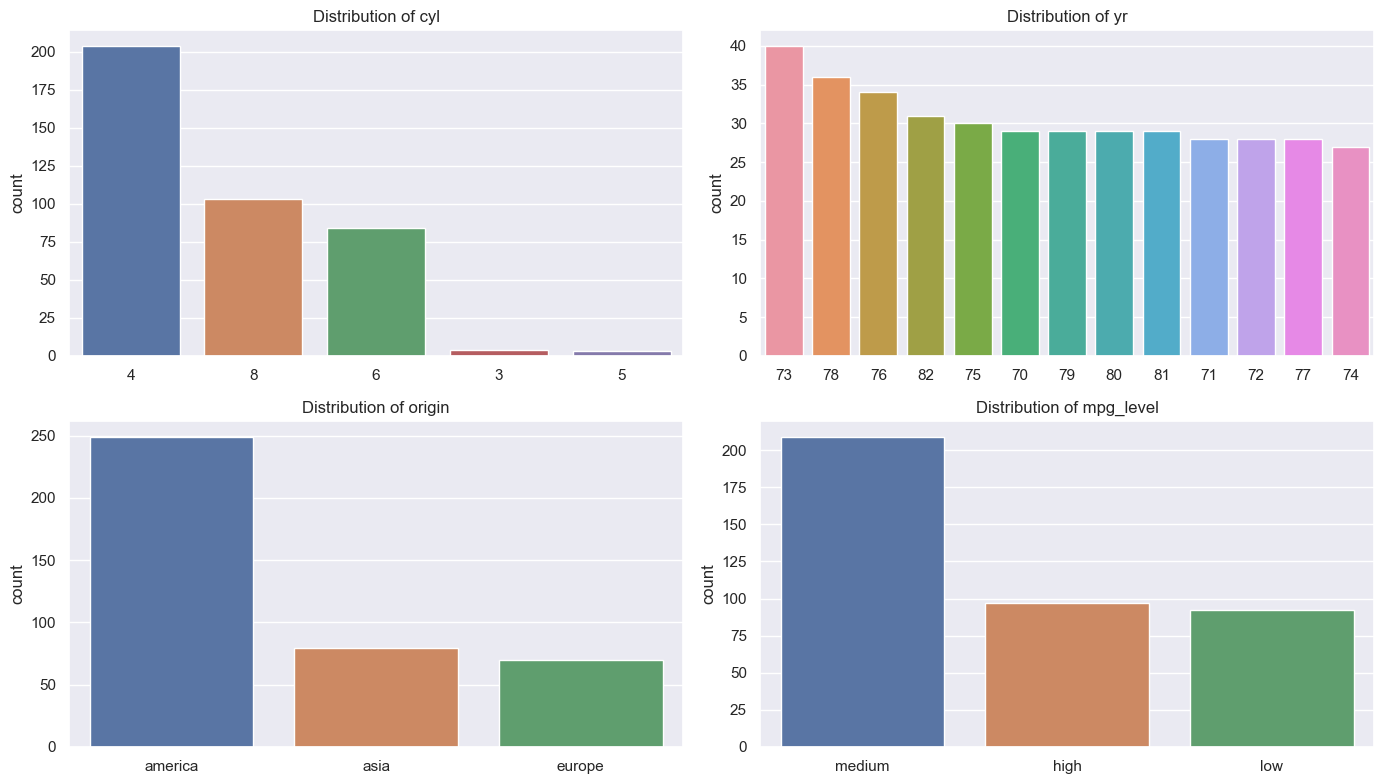

In [28]:
# plotting categorical variables
fig = plt.figure(1, (14, 8))

for i, car in enumerate(car_cat.columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.countplot(data=car_cat, x=car, order=car_cat[car].value_counts().index, ax=ax)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {car}')
    plt.tight_layout()

plt.show() 

#### Observation from above graph - American 4 cylinder cars produced in 1973 with medium mpg level seem to dominate the dateset.

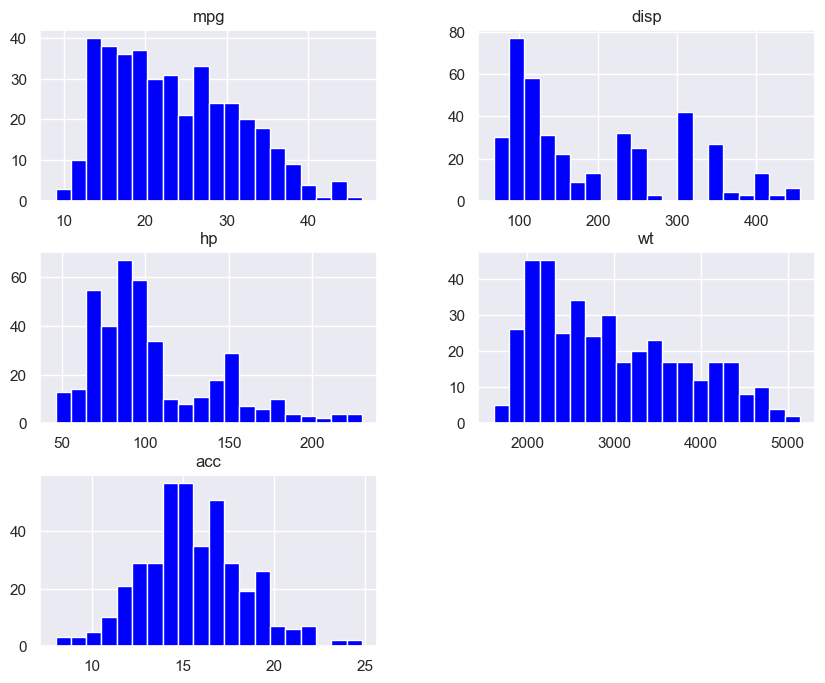

In [30]:
# Plotting the numerical values 
car_num.hist(bins = 20, figsize = (10, 8), color = 'blue')
plt.show()

<Figure size 1700x1300 with 0 Axes>

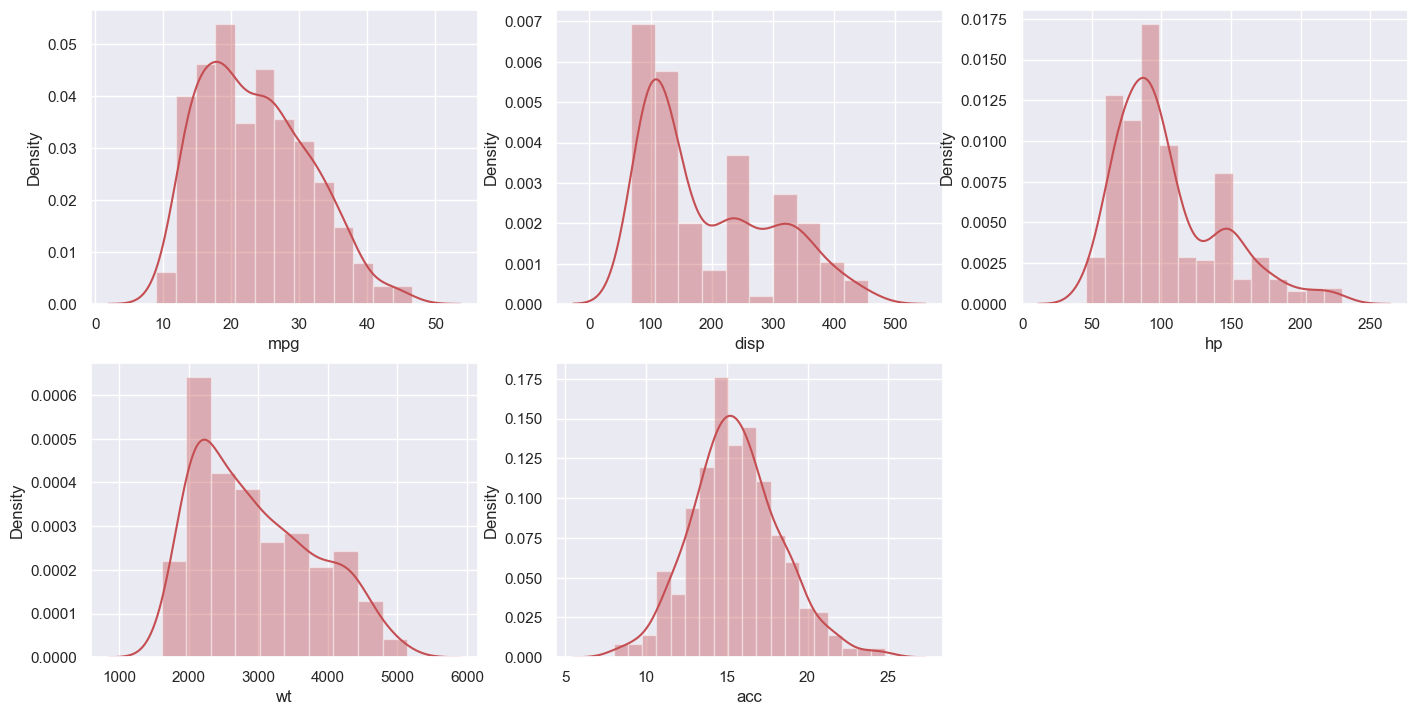

In [31]:
plt.figure(figsize=(17, 13))
plt.figure(figsize=(17, 13))
col = 1
for i in car_num.columns:
    plt.subplot(3, 3, col)
    sns.distplot(car_num[i], color = 'r');
    col += 1

#### Displacement and Horsepower seem to be skewed to the right

In [32]:
#joining the categorical and numerical variables
car=pd.concat([car_cat,car_num],axis=1)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cyl        398 non-null    int64  
 1   yr         398 non-null    int64  
 2   origin     398 non-null    object 
 3   mpg_level  398 non-null    object 
 4   mpg        398 non-null    float64
 5   disp       398 non-null    float64
 6   hp         398 non-null    float64
 7   wt         398 non-null    int64  
 8   acc        398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [33]:
car = pd.get_dummies(car, columns=['origin'])
car = pd.get_dummies(car, columns=['mpg_level'])
car.head()
carH=car.copy()
carK=car.copy()

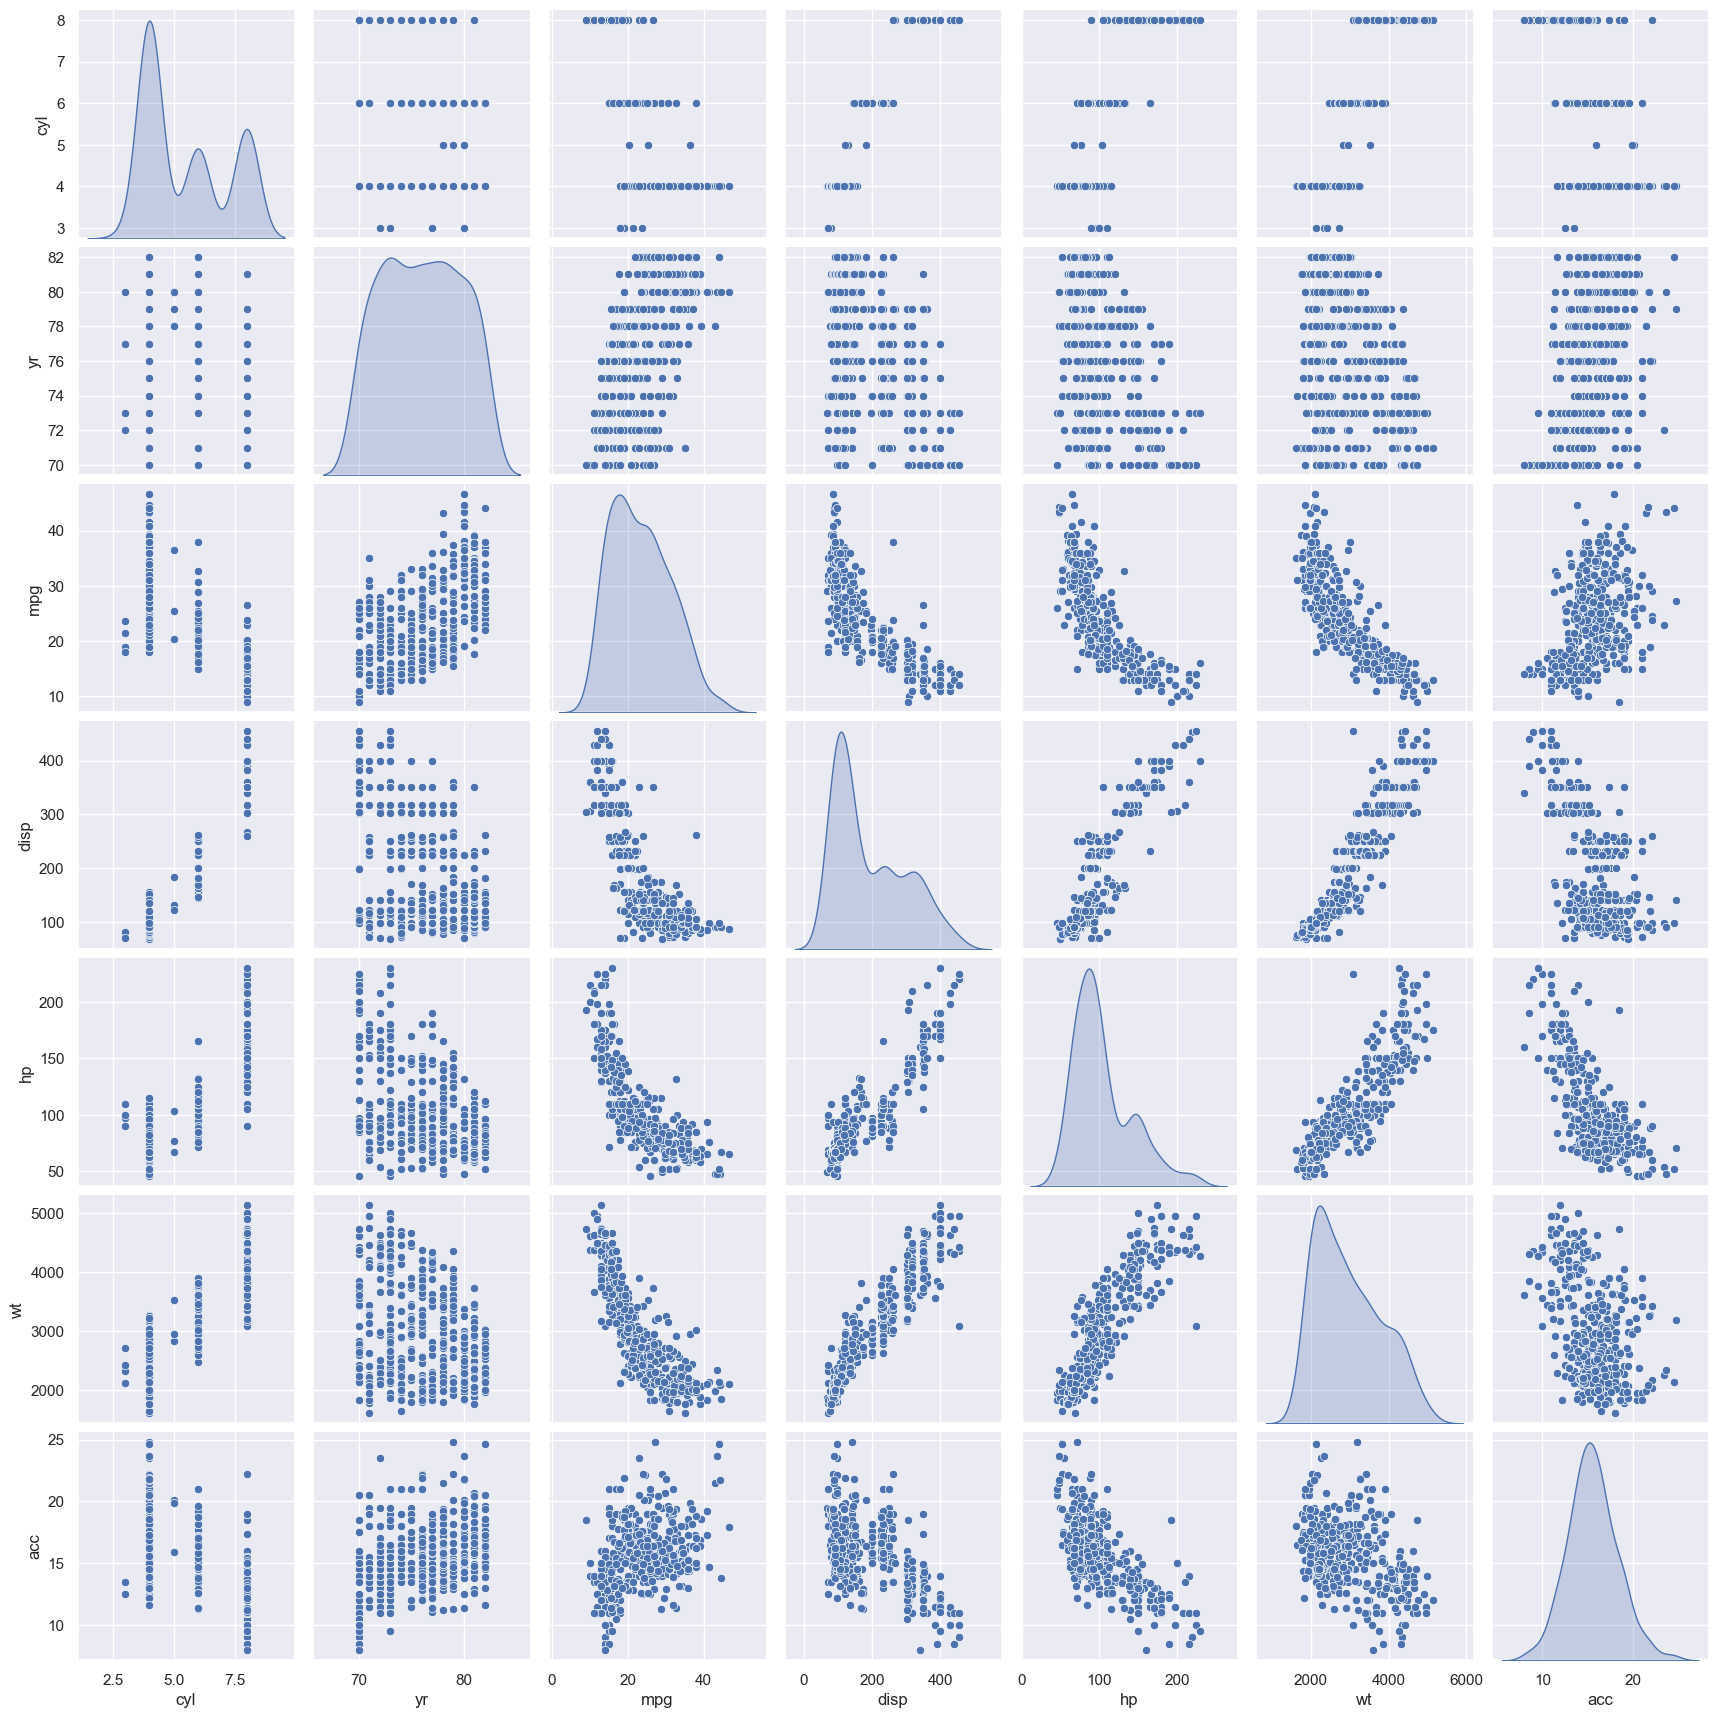

In [34]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

#### There appears to be a linear relationship between the variables

In [35]:
#dropping the created dummy variable
car2 = car.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

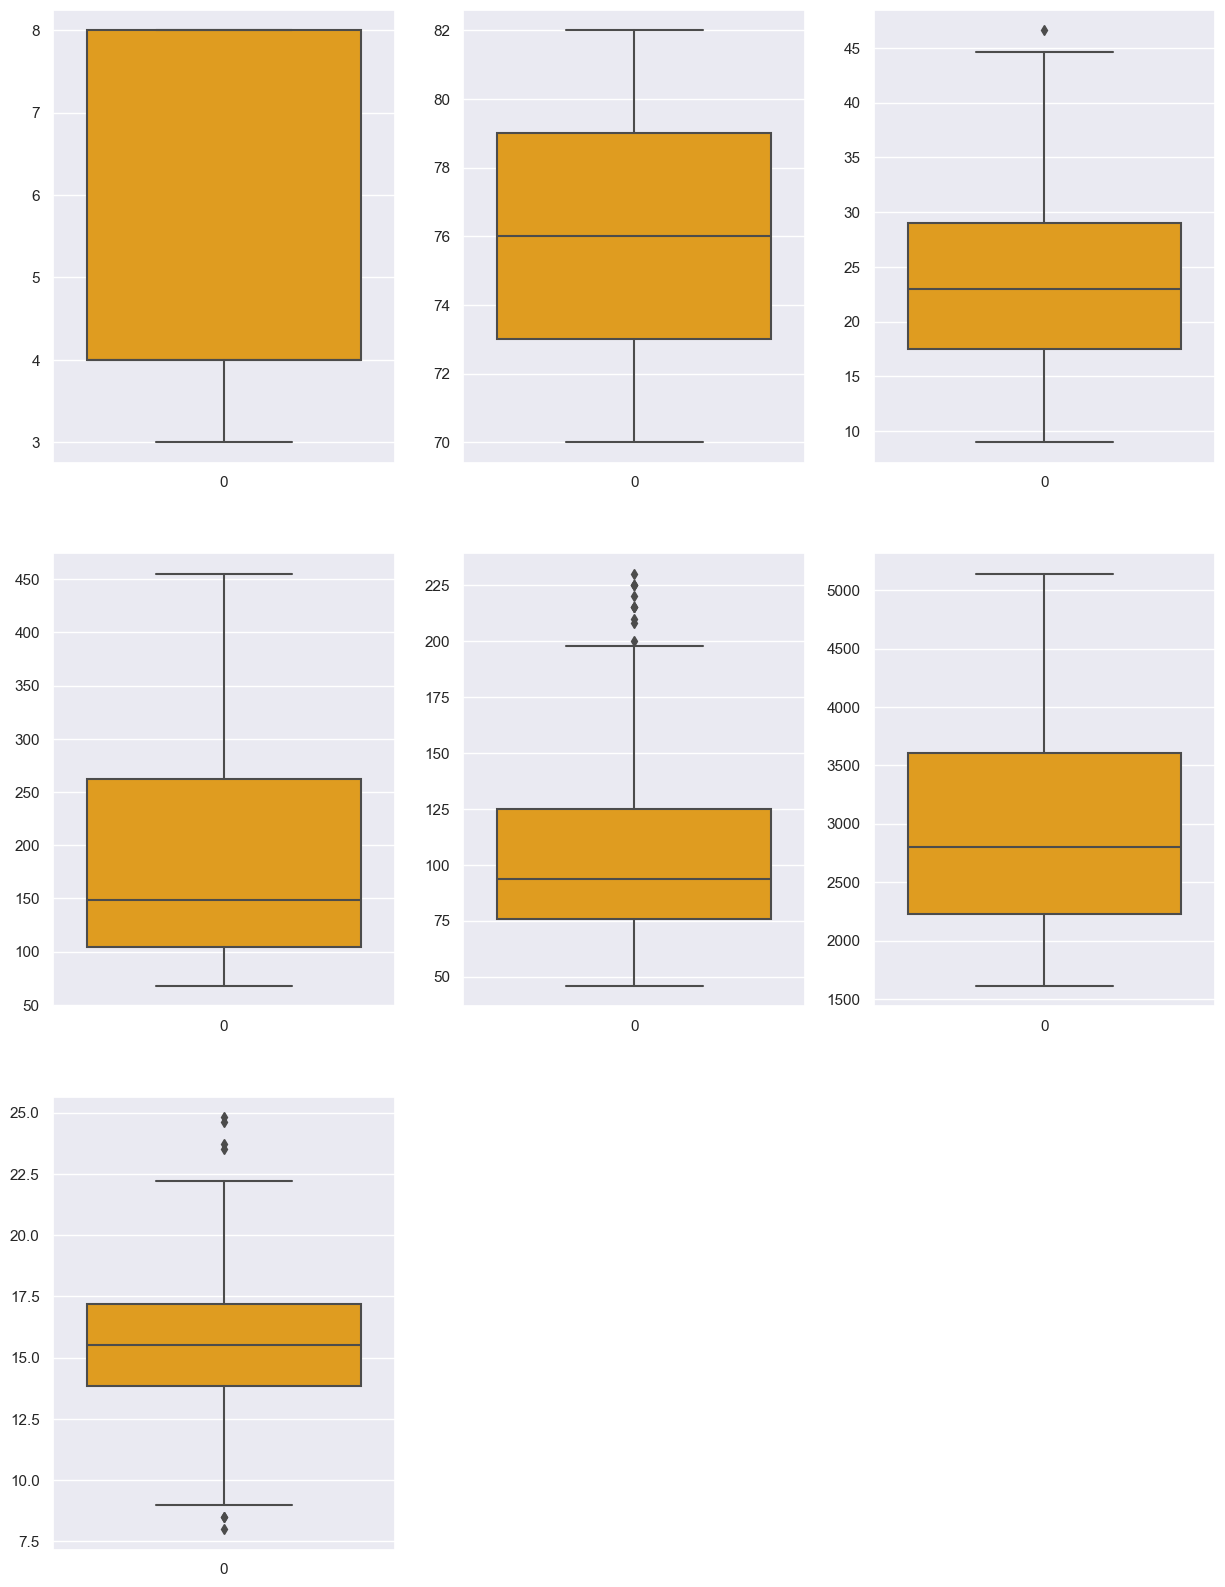

In [36]:
plt.figure(figsize=(15, 20))
col = 1
for i in car2.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(car2[i],color='orange')
    col += 1

In [37]:
IQR1 = stats.iqr(car2['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(car2['acc'], interpolation = 'midpoint')

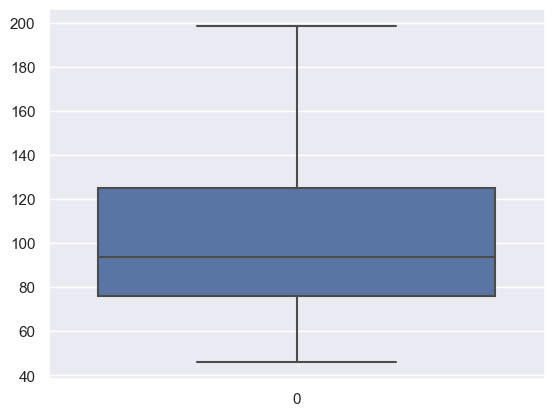

In [38]:
Q3 = car2['hp'].quantile(0.75)
car2['hp'] = np.where(car2["hp"] >(Q3+1.5*IQR1), 198.5,car2['hp'])
sns.boxplot(car2['hp']);

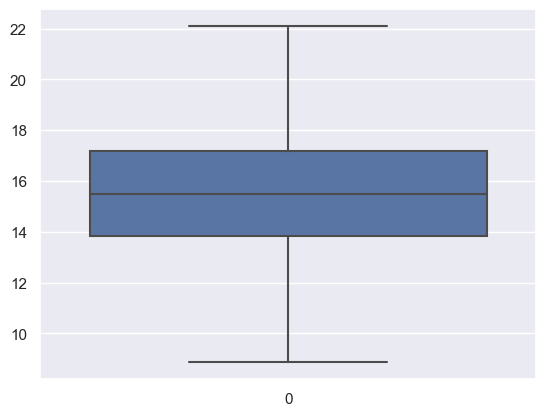

In [39]:
Q1 = car2['acc'].quantile(0.25)
Q31 = car2['acc'].quantile(0.75)
car2['acc'] = np.where(car2["acc"] >(Q31+1.5*IQR2),22.10 ,car2['acc'])
car2['acc'] = np.where(car2["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),car2['acc'])
sns.boxplot(car2['acc']);

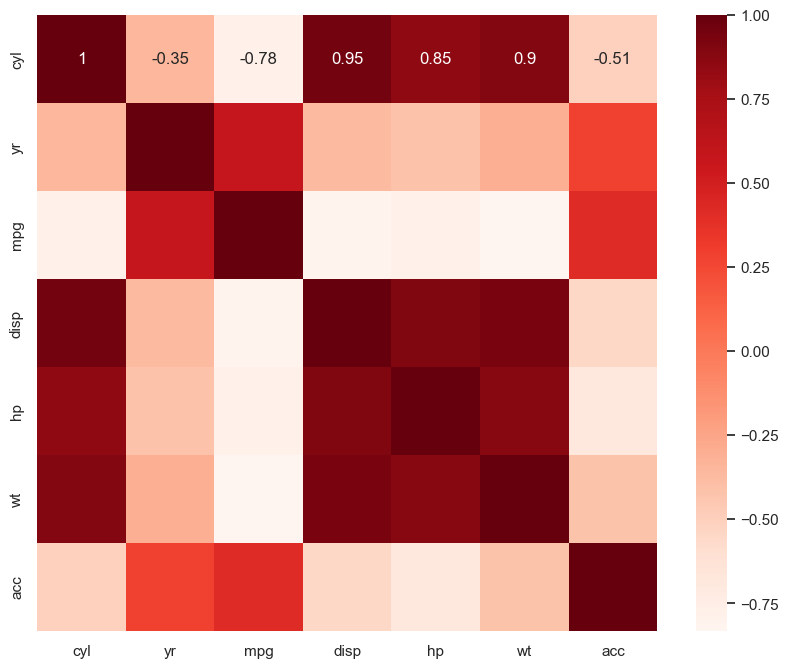

In [40]:
#checking for correlation
plt.figure(figsize = (10,8))
corr = car2.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds);

#### Except Year, most of the variable are correlated with each other

### Hierarchical clustering

In [41]:
# separating numeric variables
cc = car.iloc[:,0:7] 
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,8,70,18.0,307.0,130.0,3504,12.0
1,8,70,15.0,350.0,165.0,3693,11.5
2,8,70,18.0,318.0,150.0,3436,11.0
3,8,70,16.0,304.0,150.0,3433,12.0
4,8,70,17.0,302.0,140.0,3449,10.5


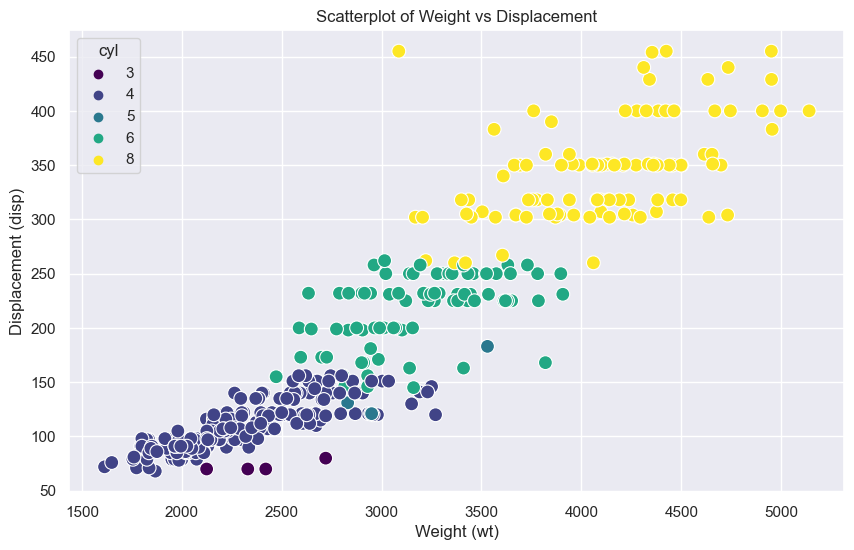

In [43]:
# Scatterplot 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='wt', y='disp', hue='cyl', palette='viridis', s=100)

# Title and labels
plt.title('Scatterplot of Weight vs Displacement')
plt.xlabel('Weight (wt)')
plt.ylabel('Displacement (disp)')

# Display plot
plt.show()

### Key insights from the scatterplot:

Positive Correlation: Weight and displacement have a positive correlation; as one increases, so does the other.

Cylinder Distribution:

3 Cylinders: Rare, clustered at low weight and displacement.
4 Cylinders: Common, wide range but generally lower weight and displacement.
5 Cylinders: Rare, mid-range weight and displacement.
6 Cylinders: Mid to high range in weight and displacement.
8 Cylinders: Concentrated at high weight and displacement, indicating larger, more powerful vehicles.
Distinct Clusters: 4, 6, and 8-cylinder vehicles form distinct clusters, reflecting different vehicle design optimizations.

Outliers: High weight and displacement outliers are mostly 8-cylinder vehicles, likely specialized or high-performance models.

Variety in 4-Cylinder Vehicles: Spread across a significant range, indicating various vehicle types from economy cars to light-duty trucks.

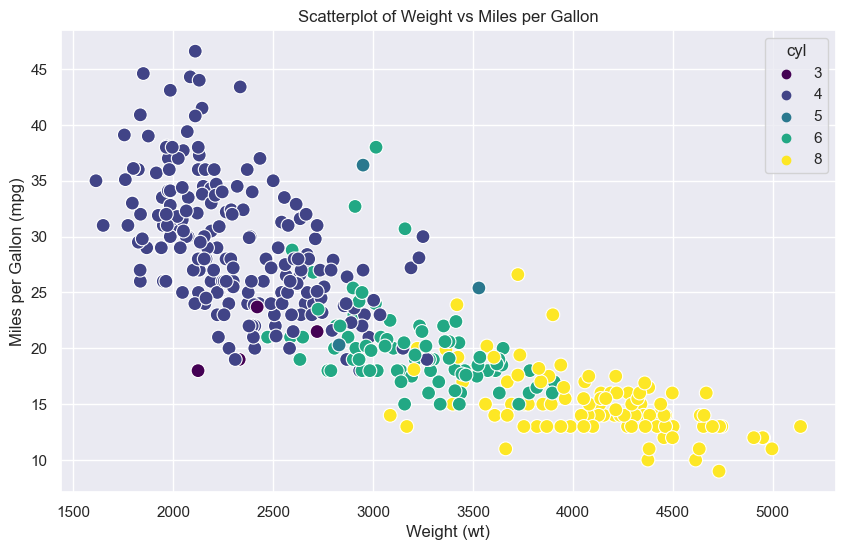

In [44]:
# Scatterplot 2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='wt', y='mpg', hue='cyl', palette='viridis', s=100)

# Title and labels
plt.title('Scatterplot of Weight vs Miles per Gallon')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')

# Display plot
plt.show()

#### Key insights from the scatterplot of Weight (wt) vs. Miles per Gallon (mpg), with datapoints distinguishable by the number of cylinders (cyl):

1. **Negative Correlation**: There is a clear negative correlation between weight and miles per gallon. As the weight of the vehicle increases, the miles per gallon generally decreases.

2. **Cylinder Distribution**:
   - **3 Cylinders**: Few datapoints, located at low weights and high mpg values.
   - **4 Cylinders**: Concentrated at lower weights and higher mpg values, indicating these are lighter and more fuel-efficient vehicles.
   - **5 Cylinders**: Sparse, spread across mid-range weights and mpg values.
   - **6 Cylinders**: Located in the mid to higher range of weights, with mid-range mpg values.
   - **8 Cylinders**: Concentrated at higher weights and lower mpg values, indicating these are heavier and less fuel-efficient vehicles.

3. **Distinct Clusters**:
   - Vehicles with 4 cylinders are clustered at lower weights and higher mpg, showing they are more fuel-efficient.
   - Vehicles with 6 cylinders are in the mid-range for both weight and mpg.
   - Vehicles with 8 cylinders are clustered at higher weights and lower mpg, reflecting their higher fuel consumption.

4. **Fuel Efficiency**:
   - Vehicles with fewer cylinders (3 or 4) are more fuel-efficient, with higher mpg values.
   - Vehicles with more cylinders (6 or 8) have lower mpg values, indicating lower fuel efficiency.

5. **Weight Impact**:
   - As vehicle weight increases, fuel efficiency (mpg) decreases significantly, especially noticeable in vehicles with 8 cylinders.
   - Lighter vehicles with 4 cylinders tend to be the most fuel-efficient, while heavier vehicles with 8 cylinders are the least fuel-efficient.

These insights suggest that vehicle weight and the number of cylinders significantly influence fuel efficiency, with lighter, lower-cylinder vehicles being more fuel-efficient.

In [50]:
# separating numeric variables
cc = car.iloc[:,0:7] 
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,8,70,18.0,307.0,130.0,3504,12.0
1,8,70,15.0,350.0,165.0,3693,11.5
2,8,70,18.0,318.0,150.0,3436,11.0
3,8,70,16.0,304.0,150.0,3433,12.0
4,8,70,17.0,302.0,140.0,3449,10.5


# scaling the variable
cc_z = cc.apply(zscore)
cc_z.head()

In [52]:
#calculating pairwise distance using average linkage method
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')

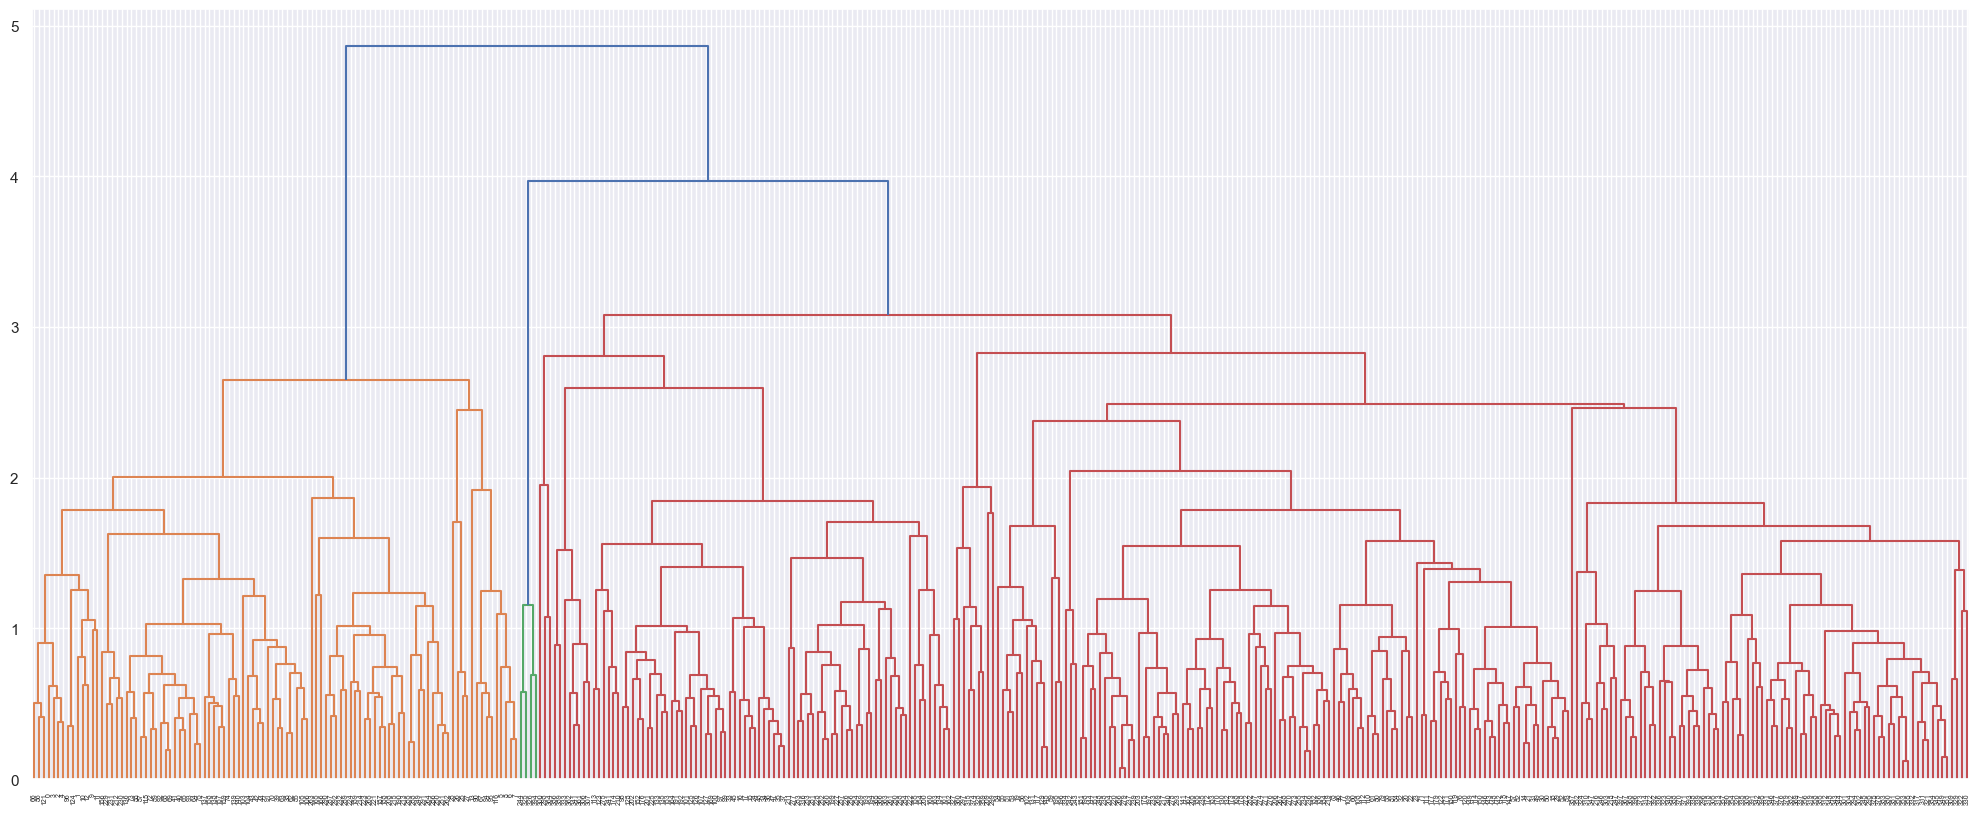

In [53]:
#plotting the H-cluster
plt.figure(figsize = (25, 10))
dendrogram(link_method)
plt.show()

#### Appears to be to a visual clutter. However if seen from top, there are 2 probable clusters seen. We will have to analyze it more to find that out. So now, we'll go ahead and cut down the dendrogram to give us 2 clusters/groups

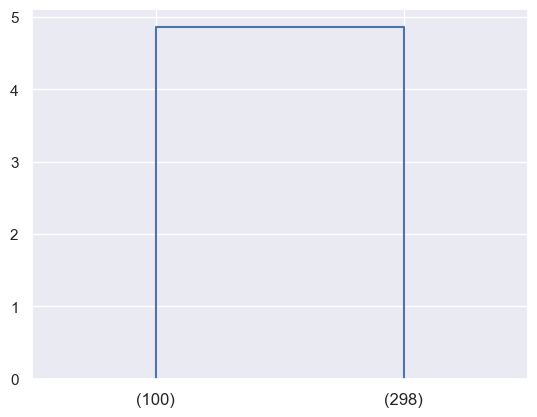

In [55]:
# dendrogram function to arrive at dendrogram
dendrogram(link_method,truncate_mode='lastp', p=2)
plt.show()

In [56]:
#viewing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [57]:
#attaching the clusters formed to the scales data
cc_z['clusters_H'] = clusters
cc_z.clusters_H.value_counts().sort_index()

clusters_H
1    100
2    298
Name: count, dtype: int64

In [58]:
#attaching the clusters formed to the original data
cc['clusters_H'] = clusters
carH['clusters_H'] = clusters
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [59]:
# create a new data set named Hcluster
Hcluster=cc
Hcluster.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [60]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
clusters_H,,,,,,,,
1,7.980000,73.740000,14.684000,345.470000,160.400000,4121.560000,12.702000,100
2,4.607383,76.771812,26.477852,142.404362,85.479866,2584.137584,16.529866,298


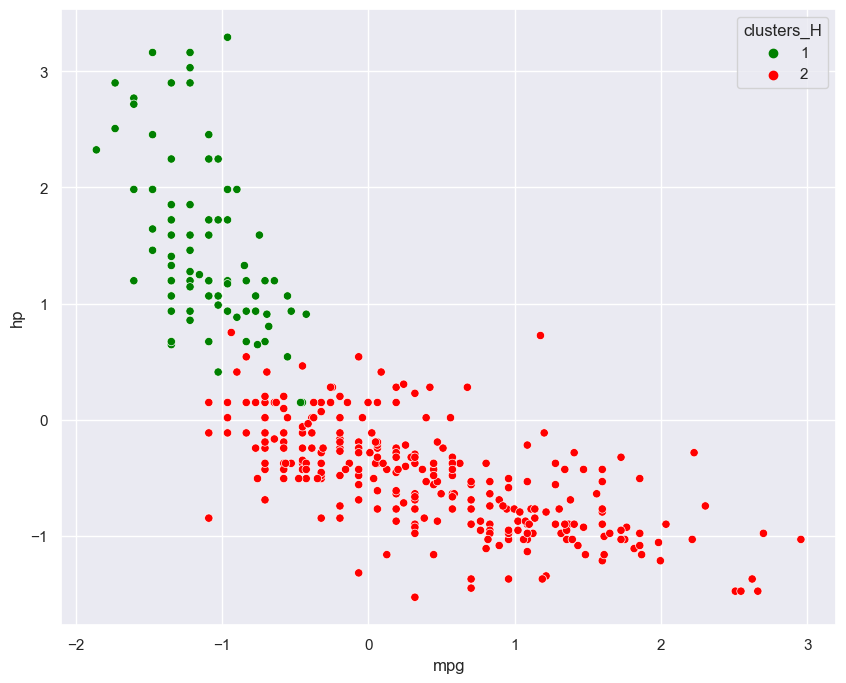

In [61]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",data=cc_z, palette=['green','red']);

In [62]:

# separating the numeric values and scaling them
cc = car.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [63]:
# calculating the within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[2785.999999999999, 1295.1229352629575, 946.019790855379, 738.415973714963]

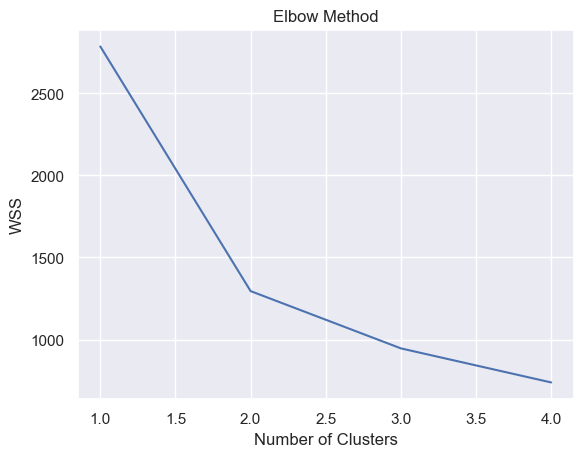

In [64]:
# plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [65]:

#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [66]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.46264452576184095

In [67]:
#calculating silhouette score for different centroids

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

silhouette_coefficients = []


# Notice you start at 2 clusters for silhouette coefficient
    
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

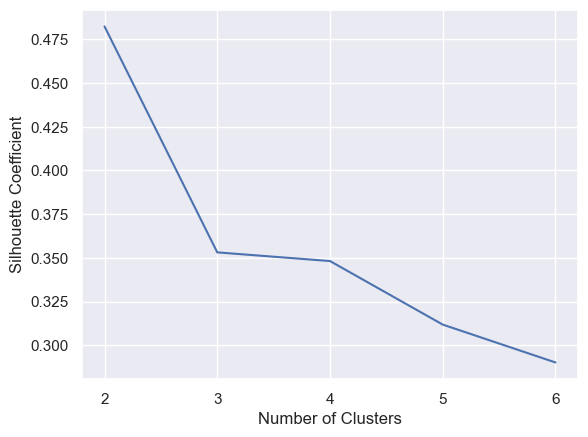

In [68]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [69]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [70]:
cc.cluster_K.value_counts().sort_index()

cluster_K
0    276
1    122
Name: count, dtype: int64

In [71]:
#attaching the clusters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [72]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
cluster_K,,,,,,,,
0,4.474638,76.974638,27.156522,133.559783,83.865942,2511.485507,16.543841,276
1,7.672131,73.827869,15.275410,328.860656,150.540984,4008.680328,13.360656,122


#### Clearly shows two distinct groups, with a difference in average between the clusters and variables

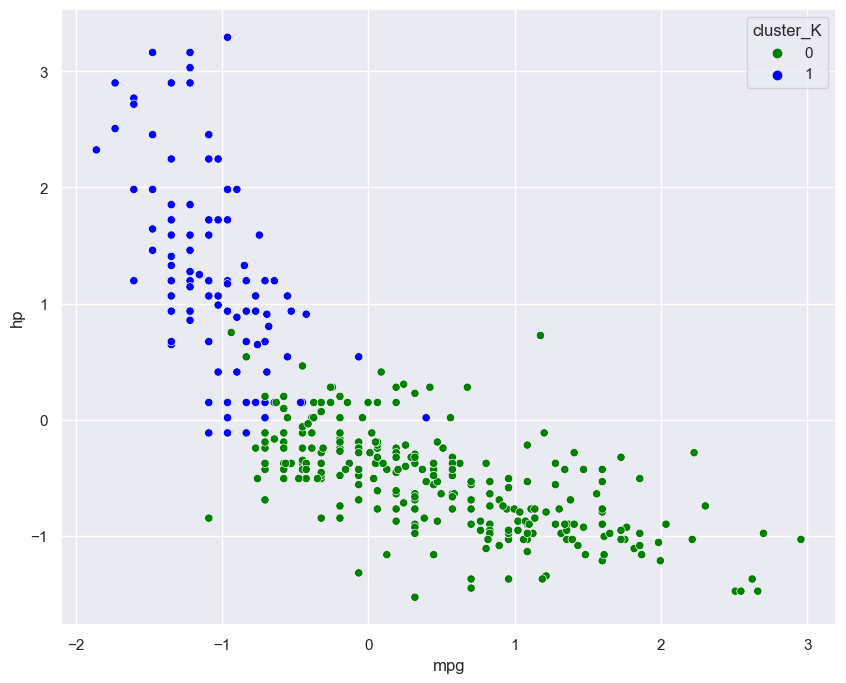

In [73]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','blue']);

In [74]:

carH.clusters_H.value_counts().sort_index()

clusters_H
1    100
2    298
Name: count, dtype: int64

In [75]:
carK.cluster_K.value_counts().sort_index()

cluster_K
0    276
1    122
Name: count, dtype: int64

In [76]:
carH.shape

(398, 14)

In [77]:
carK.shape

(398, 14)

In [78]:
car.head(20)

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium
0,8,70,18.0,307.0,130.0,3504,12.0,True,False,False,False,False,True
1,8,70,15.0,350.0,165.0,3693,11.5,True,False,False,False,True,False
2,8,70,18.0,318.0,150.0,3436,11.0,True,False,False,False,False,True
3,8,70,16.0,304.0,150.0,3433,12.0,True,False,False,False,True,False
4,8,70,17.0,302.0,140.0,3449,10.5,True,False,False,False,False,True
5,8,70,15.0,429.0,198.0,4341,10.0,True,False,False,False,True,False
6,8,70,14.0,454.0,220.0,4354,9.0,True,False,False,False,True,False
7,8,70,14.0,440.0,215.0,4312,8.5,True,False,False,False,True,False
8,8,70,14.0,455.0,225.0,4425,10.0,True,False,False,False,True,False
9,8,70,15.0,390.0,190.0,3850,8.5,True,False,False,False,True,False


#### Insights
Wwe can clearly see in both dendogram method and the elbow method, that the suggested cluster size is 2.L
looking at the final dataset, it is quite possible that the low mpg values are clubbed into 1 cluster and the high and medium mpg values are clubbed into another clust
T. the same thing is visually seen in the dendogram, where a small subset of green cluster merges with the brown cluster and then there are 2 big clusters seen at the enAn.
after clustering if we find that there are 2 distinct cluster, 3 if i am being less choNsy. now when we build 1 single model to prevIr", i am mixing up guassians and hence the spread of the data will be too high, central value becomes less relaiable and can possibly cause outliers to exist, which will play a significant role in my moHel. hence building a separate model for seperate cluster is advisable to prevent the above.

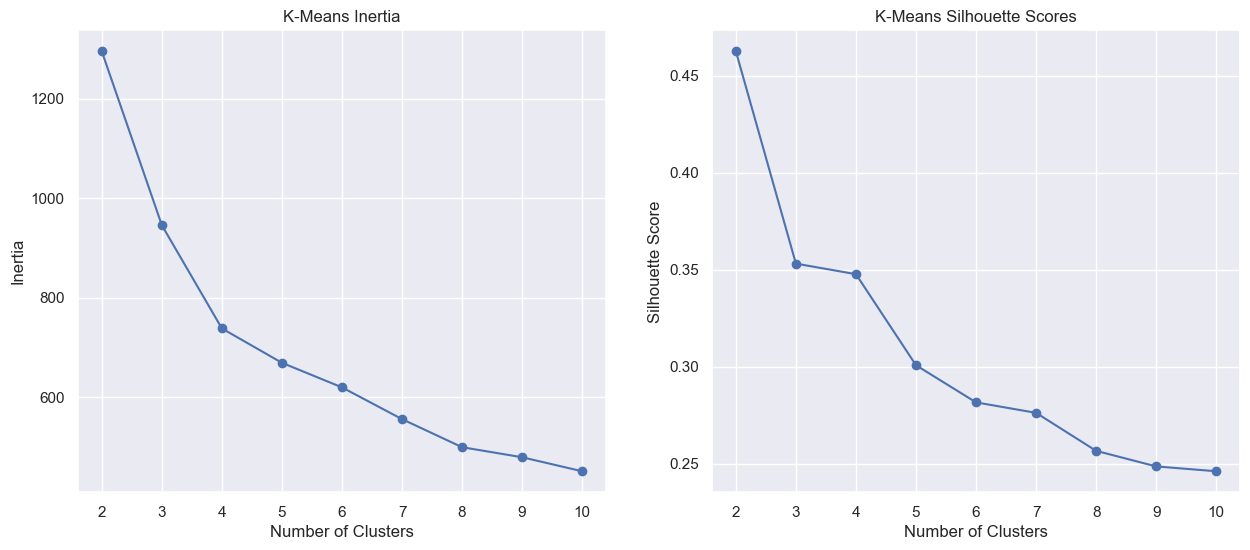

Number of clusters: 2, Silhouette Score: 0.46264452576184095
Number of clusters: 3, Silhouette Score: 0.35314791198988205
Number of clusters: 4, Silhouette Score: 0.34770360093701747
Number of clusters: 5, Silhouette Score: 0.3007504443315828
Number of clusters: 6, Silhouette Score: 0.2816014615332966
Number of clusters: 7, Silhouette Score: 0.2762034348076627
Number of clusters: 8, Silhouette Score: 0.25660990428284985
Number of clusters: 9, Silhouette Score: 0.2485842240833948
Number of clusters: 10, Silhouette Score: 0.2460919020997874


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting only the numeric columns for clustering
numeric_cols = car.select_dtypes(include=[float, int]).columns
data = car[numeric_cols].dropna()  # Drop rows with missing values

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means clustering for 2 to 10 clusters
cluster_range = range(2, 11)
inertia = []
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Plotting the inertia and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Inertia plot
ax[0].plot(cluster_range, inertia, marker='o')
ax[0].set_title('K-Means Inertia')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

# Silhouette score plot
ax[1].plot(cluster_range, silhouette_scores, marker='o')
ax[1].set_title('K-Means Silhouette Scores')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()

# Printing the silhouette scores for each number of clusters
for n_clusters, score in zip(cluster_range, silhouette_scores):
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score}')

#### Observations

2 clusters: There's a sharp drop from 2 to 3 clusters.
3 clusters: The rate of decrease in inertia slows down after 3 clusters.
4 clusters: Another noticeable bend can be seen around 4 clusters.

Based on the inertia plot and the silhouette scores plot, the possible elbow points are around 2, 3, and 4 clusters.

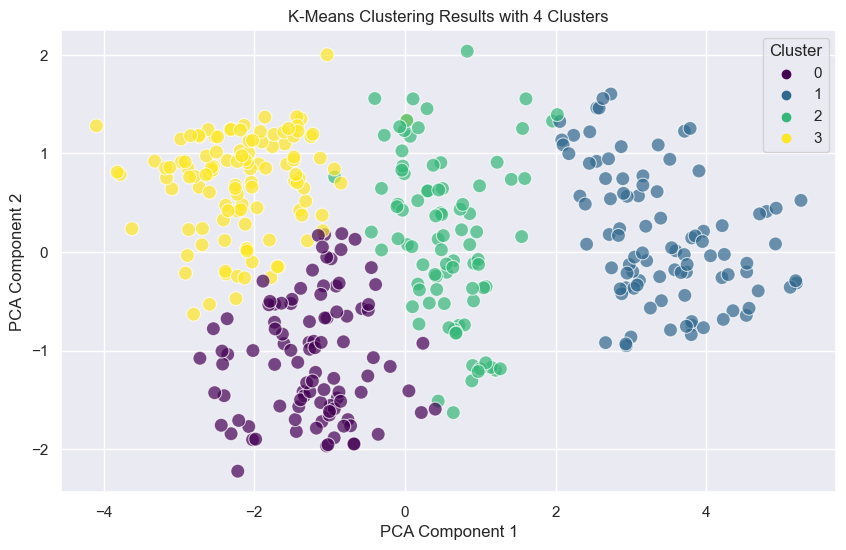

In [81]:
# Selecting only the numeric columns for clustering
numeric_cols = car.select_dtypes(include=[float, int]).columns
data = car[numeric_cols].dropna()  # Drop rows with missing values

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Train K-Means clustering model with the optimal number of clusters (4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
car['Cluster'] = cluster_labels

# Visualize the clustering results
# We'll use the first two principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
car['PCA1'] = pca_result[:, 0]
car['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=car, s=100, alpha=0.7)
plt.title('K-Means Clustering Results with 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

##### Observations

The clusters are generally well-separated, with some overlap between clusters 0, 1, and 2. This indicates that the K-means algorithm has successfully grouped the data points into distinct clusters based on their features.
Cluster 3 is more spread out, which may suggest more variability within this group or that it encompasses a broader range of data points.

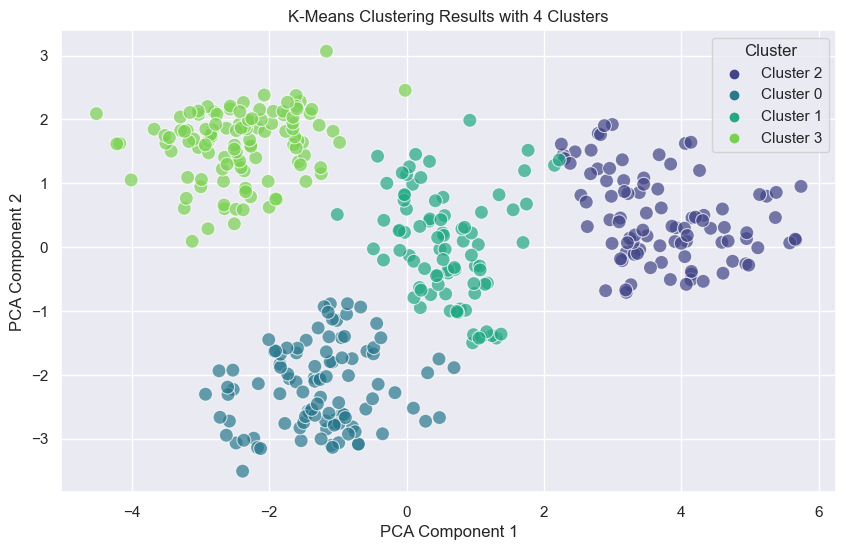

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium,Cluster,PCA1,PCA2,Cluster_Label
0,8,70,18.0,307.0,130.0,3504,12.0,True,False,False,False,False,True,2,2.899182,-0.682222,Cluster 2
1,8,70,15.0,350.0,165.0,3693,11.5,True,False,False,False,True,False,2,3.841769,-0.507228,Cluster 2
2,8,70,18.0,318.0,150.0,3436,11.0,True,False,False,False,False,True,2,3.267313,-0.588704,Cluster 2
3,8,70,16.0,304.0,150.0,3433,12.0,True,False,False,False,True,False,2,3.200625,-0.708125,Cluster 2
4,8,70,17.0,302.0,140.0,3449,10.5,True,False,False,False,False,True,2,3.192959,-0.670130,Cluster 2


In [83]:
# Selecting only the numeric columns for clustering
numeric_cols = car.select_dtypes(include=[float, int]).columns
data = car[numeric_cols].dropna()  # Drop rows with missing values

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Train K-Means clustering model with the optimal number of clusters (4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Add cluster labels to the original data
car['Cluster'] = cluster_labels

# Add a new feature with labels based on cluster value
cluster_labels_dict = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3'}
car['Cluster_Label'] = car['Cluster'].map(cluster_labels_dict)

# Visualize the clustering results
# Use PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
car['PCA1'] = pca_result[:, 0]
car['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', palette='viridis', data=car, s=100, alpha=0.7)
plt.title('K-Means Clustering Results with 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the first few rows of the DataFrame to verify the new column
car.head()

In [85]:
# Generate a random new data point within the range of the original features
new_data_point = {col: np.random.uniform(data[col].min(), data[col].max()) for col in numeric_cols}
new_data_point_values = np.array(list(new_data_point.values())).reshape(1, -1)

# Scale the new data point using the same scaler
scaled_new_data_point = scaler.transform(new_data_point_values)

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(scaled_new_data_point)

# Map the predicted cluster to the descriptive label
predicted_cluster_label = cluster_labels_dict[predicted_cluster[0]]

print(f"New data point features: {new_data_point}")
print(f"The new data point belongs to: {predicted_cluster_label}")

# Display the first few rows of the DataFrame to verify the new column
car.head()

New data point features: {'cyl': 6.372431199701091, 'yr': 81.98984927021654, 'mpg': 19.295873294335028, 'disp': 299.7140221632303, 'hp': 101.99547909624755, 'wt': 4765.303857917572, 'acc': 19.40777845941082, 'Cluster': 0.024498186483211226, 'PCA1': 1.2268154370170627, 'PCA2': -0.8479125588264633}
The new data point belongs to: Cluster 1


,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_medium,Cluster,PCA1,PCA2,Cluster_Label
0,8,70,18.0,307.0,130.0,3504,12.0,True,False,False,False,False,True,2,2.899182,-0.682222,Cluster 2
1,8,70,15.0,350.0,165.0,3693,11.5,True,False,False,False,True,False,2,3.841769,-0.507228,Cluster 2
2,8,70,18.0,318.0,150.0,3436,11.0,True,False,False,False,False,True,2,3.267313,-0.588704,Cluster 2
3,8,70,16.0,304.0,150.0,3433,12.0,True,False,False,False,True,False,2,3.200625,-0.708125,Cluster 2
4,8,70,17.0,302.0,140.0,3449,10.5,True,False,False,False,False,True,2,3.192959,-0.670130,Cluster 2


#### Observation

As we can see, the new data point belongs to Cluster 1.


### PART B

In [116]:
#import datafile
vehicle=pd.read_csv("vehicle.csv")
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [117]:
#Data type of variables in data
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [118]:
vehicle.shape

(846, 19)

In [119]:

#there are many columns which contain missing value
vehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [120]:

vehicle.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [121]:
missing_percentage = vehicle.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [125]:
# Calculate the percentage of missing values for each column
missing_percentage = vehicle.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

# Identify columns with missing values
null_columns = vehicle.columns[vehicle.isnull().any()]

# Separate numerical and categorical columns
numerical_cols = vehicle.select_dtypes(include=[np.number]).columns
categorical_cols = vehicle.select_dtypes(include=[object]).columns

# Impute numerical columns with the median
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
vehicle[numerical_cols] = num_imputer.fit_transform(vehicle[numerical_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
vehicle[categorical_cols] = pd.DataFrame(cat_imputer.fit_transform(vehicle[categorical_cols]), columns=categorical_cols)

# Combine the numerical and categorical data back into a single DataFrame
vehicle[numerical_cols] = pd.DataFrame(vehicle[numerical_cols], columns=numerical_cols)
vehicle[categorical_cols] = pd.DataFrame(vehicle[categorical_cols], columns=categorical_cols)

# Ensure the column order is the same as the original
vehicle = pd.concat([vehicle[numerical_cols], vehicle[categorical_cols]], axis=1)

# Display the percentage of missing values after imputation to confirm
remaining_missing_percentage = vehicle.isnull().mean() * 100
print("\nPercentage of missing values after imputation for each column:")
print(remaining_missing_percentage)

# Verify if there are any remaining null values
remaining_nulls = vehicle.isnull().sum()
print('\nRemaining null values in each column after imputation:')
print(remaining_nulls[remaining_nulls > 0])

Percentage of missing values for each column:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

Percentage of missing values after imputation for each column:
compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_rat

In [126]:
# Five point summary
vehicle.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846.0,NaN,NaN,NaN,93.678487,8.234474,73.0,87.0,93.0,100.0,119.0
circularity,846.0,NaN,NaN,NaN,44.823877,6.134272,33.0,40.0,44.0,49.0,59.0
distance_circularity,846.0,NaN,NaN,NaN,82.100473,15.741569,40.0,70.0,80.0,98.0,112.0
radius_ratio,846.0,NaN,NaN,NaN,168.874704,33.401356,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,846.0,NaN,NaN,NaN,61.677305,7.882188,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,846.0,NaN,NaN,NaN,8.567376,4.601217,2.0,7.0,8.0,10.0,55.0
scatter_ratio,846.0,NaN,NaN,NaN,168.887707,33.19771,112.0,147.0,157.0,198.0,265.0
elongatedness,846.0,NaN,NaN,NaN,40.93617,7.811882,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,846.0,NaN,NaN,NaN,20.580378,2.588558,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,846.0,NaN,NaN,NaN,147.998818,14.515652,118.0,137.0,146.0,159.0,188.0


Percentage of values for each class:
class
car    50.709220
bus    25.768322
van    23.522459
Name: count, dtype: float64


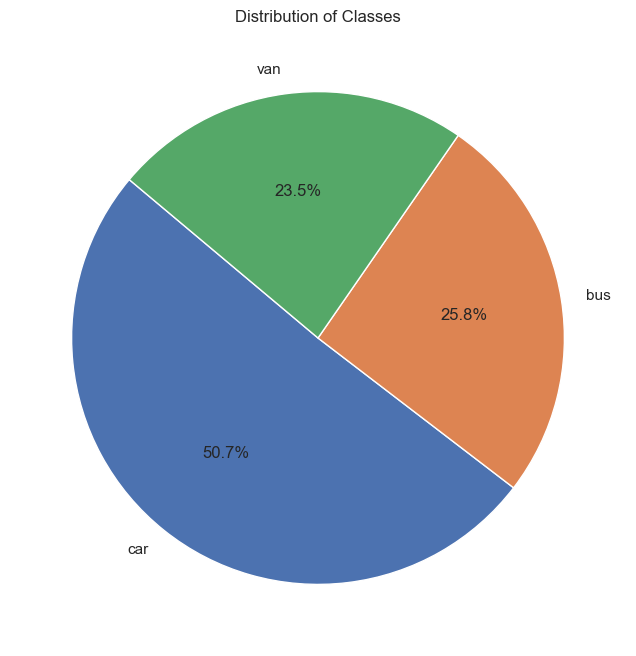

In [127]:
class_counts = vehicle['class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Print the percentage of values for each class
print("Percentage of values for each class:")
print(class_percentages)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

In [128]:
# Check for duplicate rows
duplicate_rows = vehicle.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Display the duplicate rows
print("Duplicate rows:")
print(vehicle[duplicate_rows])

# Impute by removing duplicate rows
vehicle_cleaned = vehicle.drop_duplicates()

# Verify that duplicates have been removed
duplicate_rows_after = vehicle_cleaned.duplicated()
print(f"Number of duplicate rows after removal: {duplicate_rows_after.sum()}")

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []
Number of duplicate rows after removal: 0


In [129]:
# Separate features (X) and target (Y)
X = vehicle.drop(columns=['class'])
Y = vehicle['class']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (676, 18)
X_test shape: (170, 18)
Y_train shape: (676,)
Y_test shape: (170,)


In [130]:
# Standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert the scaled data back to DataFrame for easier inspection (keeping the column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
print("First few rows of the scaled training data:")
print(X_train_scaled.head())

# Display the shapes of the resulting datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

First few rows of the scaled training data:
   compactness  circularity  distance_circularity  radius_ratio  \
0    -0.443190     0.349898              0.182642     -0.252763   
1     1.008227     1.156070              1.206724      1.274414   
2     1.371081     1.317305              1.654760      1.068832   
3     2.580596     1.156070              1.142719      0.980726   
4     1.854887     1.639774              0.886699      0.628301   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.249020                 0.252818      -0.169670   
1              0.249020                 0.252818       1.058019   
2              0.129036                 0.650734       1.641171   
3              0.009052                 0.252818       1.487710   
4             -0.590867                -0.543014       2.224324   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129128               -0.213492                   0.818422   
1      -

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, Y_train)

# Predict on the train data
Y_train_pred = svm_model.predict(X_train_scaled)

# Predict on the test data
Y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model on train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_classification_rep = classification_report(Y_train, Y_train_pred)
train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_classification_rep = classification_report(Y_test, Y_test_pred)
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Print the evaluation results for train data
print("Training Data Metrics")
print(f"Accuracy: {train_accuracy:.2f}")
print("\nClassification Report:")
print(train_classification_rep)
print("\nConfusion Matrix:")
print(train_conf_matrix)

# Print the evaluation results for test data
print("\nTest Data Metrics")
print(f"Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(test_classification_rep)
print("\nConfusion Matrix:")
print(test_conf_matrix)

Training Data Metrics
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

         bus       0.94      0.96      0.95       166
         car       0.98      0.97      0.97       351
         van       0.97      0.97      0.97       159

    accuracy                           0.97       676
   macro avg       0.96      0.97      0.96       676
weighted avg       0.97      0.97      0.97       676


Confusion Matrix:
[[160   5   1]
 [  8 339   4]
 [  2   3 154]]

Test Data Metrics
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

         bus       0.91      0.94      0.92        52
         car       0.96      0.91      0.93        78
         van       0.93      0.97      0.95        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170


Confusion Matrix:
[[49  2  1]
 [ 5 71  2]
 [ 0  1 39]

In [135]:
# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 10 components
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio for each component
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)

# Train an SVM classifier on the PCA-transformed data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, Y_train)

# Predict on the train data
Y_train_pred = svm_model.predict(X_train_pca)

# Predict on the test data
Y_test_pred = svm_model.predict(X_test_pca)

# Evaluate the model on train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_classification_rep = classification_report(Y_train, Y_train_pred)
train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_classification_rep = classification_report(Y_test, Y_test_pred)
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Print the evaluation results for train data
print("\nTraining Data Metrics")
print(f"Accuracy: {train_accuracy:.2f}")
print("\nClassification Report:")
print(train_classification_rep)
print("\nConfusion Matrix:")
print(train_conf_matrix)

# Print the evaluation results for test data
print("\nTest Data Metrics")
print(f"Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(test_classification_rep)
print("\nConfusion Matrix:")
print(test_conf_matrix)

Explained variance ratio of each component:
[0.5218586  0.16543213 0.11108718 0.06744701 0.04983658 0.0272006
 0.01865531 0.01237051 0.00868248 0.0050585 ]

Training Data Metrics
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

         bus       0.87      0.92      0.89       166
         car       0.96      0.92      0.94       351
         van       0.90      0.93      0.92       159

    accuracy                           0.92       676
   macro avg       0.91      0.92      0.91       676
weighted avg       0.92      0.92      0.92       676


Confusion Matrix:
[[152   9   5]
 [ 18 322  11]
 [  5   6 148]]

Test Data Metrics
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

         bus       0.85      0.88      0.87        52
         car       0.91      0.90      0.90        78
         van       0.97      0.95      0.96        40

    accuracy                           0.91       170
   mac

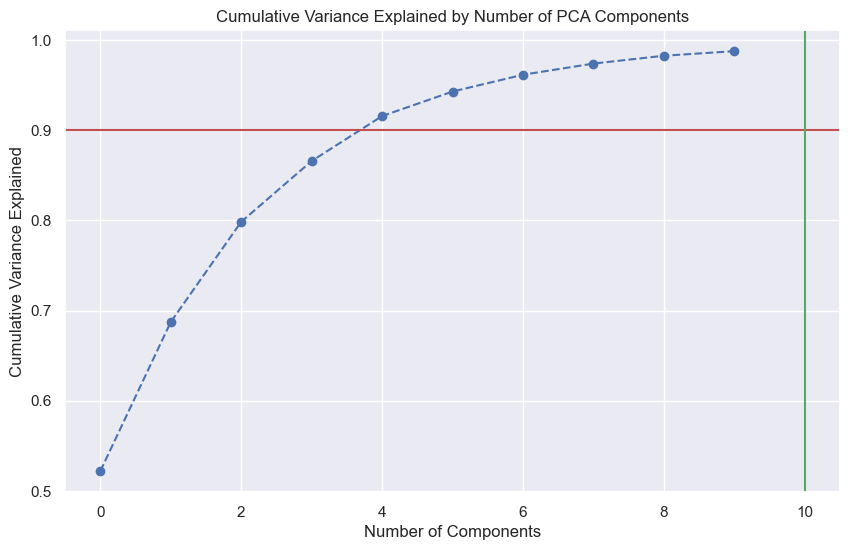

In [137]:

# Calculate the cumulative explained variance
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_explained, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-')  # line for 90% explained variance
plt.axvline(x=10, color='g', linestyle='-')  # line for 10 components
plt.show()

In [138]:
# Apply PCA to determine the number of components to explain 90% variance
pca = PCA()
pca.fit(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to explain at least 90% variance
num_components = np.argmax(cumulative_variance_explained >= 0.90) + 1
print(f"Number of components explaining at least 90% variance: {num_components}")

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio for each component
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)

# Print cumulative explained variance ratio
print("\nCumulative explained variance ratio:")
print(cumulative_variance_explained)

# Train an SVM classifier on the PCA-transformed data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_pca, Y_train)

# Predict on the train data
Y_train_pred = svm_model.predict(X_train_pca)

# Predict on the test data
Y_test_pred = svm_model.predict(X_test_pca)

# Evaluate the model on train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_classification_rep = classification_report(Y_train, Y_train_pred)
train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_classification_rep = classification_report(Y_test, Y_test_pred)
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Print the evaluation results for train data
print("\nTraining Data Metrics")
print(f"Accuracy: {train_accuracy:.2f}")
print("\nClassification Report:")
print(train_classification_rep)
print("\nConfusion Matrix:")
print(train_conf_matrix)

# Print the evaluation results for test data
print("\nTest Data Metrics")
print(f"Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(test_classification_rep)
print("\nConfusion Matrix:")
print(test_conf_matrix)

Number of components explaining at least 90% variance: 5
Explained variance ratio of each component:
[0.5218586  0.16543213 0.11108718 0.06744701 0.04983658]

Cumulative explained variance ratio:
[0.5218586  0.68729072 0.7983779  0.86582491 0.91566149 0.94286209
 0.9615174  0.97388792 0.9825704  0.9876289  0.99134624 0.99384041
 0.9958511  0.99734346 0.99831662 0.9991598  0.99979644 1.        ]

Training Data Metrics
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

         bus       0.58      0.55      0.57       166
         car       0.77      0.82      0.79       351
         van       0.57      0.51      0.54       159

    accuracy                           0.68       676
   macro avg       0.64      0.63      0.63       676
weighted avg       0.67      0.68      0.68       676


Confusion Matrix:
[[ 91  47  28]
 [ 28 289  34]
 [ 37  41  81]]

Test Data Metrics
Accuracy: 0.64

Classification Report:
              precision    recall  f

##### Insights

### Key Points and Critical Highlights

#### PCA Components and Variance Explained
- **Number of Components**: 5 components explain at least 90% of the variance.
- **Explained Variance**:
  - Component 1: 52.19%
  - Component 2: 16.54%
  - Component 3: 11.11%
  - Component 4: 6.74%
  - Component 5: 4.98%
- **Cumulative Explained Variance**: Reaches 91.57% with 5 components.

#### Model Performance on Training Data
- **Accuracy**: 68%
- **Class-wise Performance**:
  - **Bus**: Precision 0.58, Recall 0.55, F1-Score 0.57
  - **Car**: Precision 0.77, Recall 0.82, F1-Score 0.79
  - **Van**: Precision 0.57, Recall 0.51, F1-Score 0.54
- **Confusion Matrix Trends**: Buses often misclassified as cars; vans misclassified as both buses and cars.

#### Model Performance on Test Data
- **Accuracy**: 64%
- **Class-wise Performance**:
  - **Bus**: Precision 0.62, Recall 0.46, F1-Score 0.53
  - **Car**: Precision 0.68, Recall 0.82, F1-Score 0.74
  - **Van**: Precision 0.57, Recall 0.53, F1-Score 0.55
- **Confusion Matrix Trends**: Similar misclassification trends as training data.

#### Critical Insights
1. **Dimensionality Reduction**: PCA effectively reduced dimensionality while retaining over 90% of variance with 5 components.
2. **Model Performance**: Moderate accuracy (68% on training, 64% on test) with good performance on 'car' but weaker on 'bus' and 'van'.
3. **Misclassification Issues**: Significant misclassification of 'bus' as 'car' and 'van' as both 'bus' and 'car'.
4. **Improvement Areas**: Potential for improvement through feature engineering, hyperparameter tuning, advanced models, and handling class imbalance.

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Setup the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV to find the best parameters
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, Y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Train the best SVM model
best_svm.fit(X_train_pca, Y_train)

# Predict on the train data
Y_train_pred = best_svm.predict(X_train_pca)

# Predict on the test data
Y_test_pred = best_svm.predict(X_test_pca)

# Evaluate the model on train data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_classification_rep = classification_report(Y_train, Y_train_pred)
train_conf_matrix = confusion_matrix(Y_train, Y_train_pred)

# Evaluate the model on test data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_classification_rep = classification_report(Y_test, Y_test_pred)
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Print the evaluation results for train data
print("\nTraining Data Metrics")
print(f"Accuracy: {train_accuracy:.2f}")
print("\nClassification Report:")
print(train_classification_rep)
print("\nConfusion Matrix:")
print(train_conf_matrix)

# Print the evaluation results for test data
print("\nTest Data Metrics")
print(f"Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(test_classification_rep)
print("\nConfusion Matrix:")
print(test_conf_matrix)

Best parameters found: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Training Data Metrics
Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

         bus       0.92      0.89      0.91       166
         car       0.92      0.94      0.93       351
         van       0.88      0.87      0.87       159

    accuracy                           0.91       676
   macro avg       0.91      0.90      0.90       676
weighted avg       0.91      0.91      0.91       676


Confusion Matrix:
[[148  12   6]
 [  7 331  13]
 [  6  15 138]]

Test Data Metrics
Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

         bus       0.80      0.79      0.80        52
         car       0.82      0.86      0.84        78
         van       0.73      0.68      0.70        40

    accuracy                           0.79       170
   macro avg       0.78      0.77      0.78       170
weighted avg       0.79      0.79      

### Initial Model (Without Hyperparameter Tuning)

#### PCA Components and Variance Explained
- **Number of Components**: 5
- **Explained Variance**: 91.57%

#### Training Data Metrics
- **Accuracy**: 68%
- **Precision, Recall, F1-Score**:
  - **Bus**: Precision 0.58, Recall 0.55, F1-Score 0.57
  - **Car**: Precision 0.77, Recall 0.82, F1-Score 0.79
  - **Van**: Precision 0.57, Recall 0.51, F1-Score 0.54
- **Confusion Matrix**:
  - Bus: 91 correctly classified, 47 misclassified as car, 28 misclassified as van
  - Car: 289 correctly classified, 28 misclassified as bus, 34 misclassified as van
  - Van: 81 correctly classified, 37 misclassified as bus, 41 misclassified as car

### Tuned Model (Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'})

#### Training Data Metrics
- **Accuracy**: 91%
- **Precision, Recall, F1-Score**:
  - **Bus**: Precision 0.92, Recall 0.89, F1-Score 0.91
  - **Car**: Precision 0.92, Recall 0.94, F1-Score 0.93
  - **Van**: Precision 0.88, Recall 0.87, F1-Score 0.87
- **Confusion Matrix**:
  - Bus: 148 correctly classified, 12 misclassified as car, 6 misclassified as van
  - Car: 331 correctly classified, 7 misclassified as bus, 13 misclassified as van
  - Van: 138 correctly classified, 6 misclassified as bus, 15 misclassified as car

#### Test Data Metrics
- **Accuracy**: 79%
- **Precision, Recall, F1-Score**:
  - **Bus**: Precision 0.80, Recall 0.79, F1-Score 0.80
  - **Car**: Precision 0.82, Recall 0.86, F1-Score 0.84
  - **Van**: Precision 0.73, Recall 0.68, F1-Score 0.70
- **Confusion Matrix**:
  - Bus: 41 correctly classified, 8 misclassified as car, 3 misclassified as van
  - Car: 67 correctly classified, 4 misclassified as bus, 7 misclassified as van
  - Van: 27 correctly classified, 6 misclassified as bus, 7 misclassified as car

### Improvement in Performance
#### Training Data
- **Accuracy**: Increased from 68% to 91% (23% improvement)
- **Bus**:
  - Precision: Increased from 0.58 to 0.92 (34% improvement)
  - Recall: Increased from 0.55 to 0.89 (34% improvement)
  - F1-Score: Increased from 0.57 to 0.91 (34% improvement)
- **Car**:
  - Precision: Increased from 0.77 to 0.92 (15% improvement)
  - Recall: Increased from 0.82 to 0.94 (12% improvement)
  - F1-Score: Increased from 0.79 to 0.93 (14% improvement)
- **Van**:
  - Precision: Increased from 0.57 to 0.88 (31% improvement)
  - Recall: Increased from 0.51 to 0.87 (36% improvement)
  - F1-Score: Increased from 0.54 to 0.87 (33% improvement)

#### Test Data
- **Accuracy**: Increased from 64% to 79% (15% improvement)
- **Bus**:
  - Precision: Increased from 0.62 to 0.80 (18% improvement)
  - Recall: Increased from 0.46 to 0.79 (33% improvement)
  - F1-Score: Increased from 0.53 to 0.80 (27% improvement)
- **Car**:
  - Precision: Increased from 0.68 to 0.82 (14% improvement)
  - Recall: Increased from 0.82 to 0.86 (4% improvement)
  - F1-Score: Increased from 0.74 to 0.84 (10% improvement)
- **Van**:
  - Precision: Increased from 0.57 to 0.73 (16% improvement)
  - Recall: Increased from 0.53 to 0.68 (15% improvement)
  - F1-Score: Increased from 0.55 to 0.70 (15% improvement)

### Insights
1. **Significant Accuracy Improvement**:
   - Training accuracy increased by 23%.
   - Test accuracy increased by 15%.

2. **Class-wise Performance**:
   - Major improvements in precision, recall, and F1-score across all classes, particularly for the 'bus' and 'van' classes.
   - The 'car' class, which already had decent performance, saw improvements especially in precision and F1-score.

3. **Misclassification Reduction**:
   - Significant reduction in misclassifications, particularly for the 'bus' and 'van' classes.
   - Improved ability to correctly classify 'bus' and 'van', as seen in the confusion matrix.

4. **Tuning Effectiveness**:
   - Hyperparameter tuning using grid search led to substantial performance gains, indicating the importance of parameter optimization in SVM.

### Recommendations
1. **Further Tuning**: Explore additional hyperparameter ranges or different optimization techniques (e.g., random search, Bayesian optimization) for potentially better performance.
2. **Advanced Models**: Consider experimenting with more advanced models (e.g., ensemble methods like Random Forest or Gradient Boosting) to further improve classification performance.
3. **Class Imbalance Handling**: Techniques such as SMOTE or class weighting might help to further reduce misclassifications, especially for the minority classes.

The hyperparameter tuning greatly enhanced the SVM model's performance, particularly for the previously underperforming 'bus' and 'van' classes. Further exploration and optimization could yield even better results.els could help achieve even better results.

### A. Prerequisites/Assumptions of PCA

#### 1. Linearity
PCA assumes that the principal components are linear combinations of the original variables. This means that PCA works best for datasets where relationships between variables are linear. Non-linear relationships are not well-captured by PCA.

#### 2. Large Variance Capture
PCA aims to capture the directions (principal components) that maximize variance in the data. It assumes that the most important information is contained in the directions where the data varies the most. If the important information is in the lower variance regions, PCA might not capture it effectively.

#### 3. Mean-Centered Data
PCA assumes that the data is centered around the mean (i.e., mean of each feature is zero). This is because PCA works with the covariance matrix of the data, and centering the data ensures that the first principal component captures the direction of maximum variance.

#### 4. Independent Components
PCA assumes that the principal components are orthogonal (independent) to each other. This orthogonality means that each principal component captures a unique direction of variance in the data, with no redundancy between components.

#### 5. Scale Sensitivity
PCA is sensitive to the scale of the variables. Variables with larger scales can dominate the principal components. Therefore, it is essential to standardize or normalize the data before applying PCA to ensure that all variables contribute equally to the analysis.

### B. Advantages and Limitations of PCA

#### Advantages
1. **Dimensionality Reduction**
   PCA reduces the number of dimensions in the dataset, simplifying the data without losing much information. This can make the data easier to visualize and analyze, and can improve the performance of machine learning algorithms by reducing overfitting.

2. **Noise Reduction**
   By focusing on the principal components that capture the most variance, PCA can help to filter out noise and irrelevant information, improving the signal-to-noise ratio in the data.

3. **Computational Efficiency**
   Reducing the number of dimensions with PCA can significantly decrease the computational load for subsequent processing steps, making algorithms faster and more efficient, especially with large datasets.

4. **Correlation Handling**
   PCA can handle correlated features effectively by transforming them into a set of uncorrelated principal components, which can simplify the structure of the data.

#### Limitations
1. **Interpretability**
   The principal components generated by PCA are linear combinations of the original variables, which can make them difficult to interpret. It is often not clear what each principal component represents in the context of the original features.

2. **Linearity Assumption**
   PCA assumes linear relationships between variables. If the underlying structure of the data is non-linear, PCA might not capture the important patterns effectively, and other dimensionality reduction techniques like Kernel PCA or t-SNE might be more appropriate.

3. **Variance-Based Focus**
   PCA focuses on capturing variance, which might not always correspond to the most important features for a specific analysis. Important low-variance features might be ignored, leading to potential loss of critical information.

4. **Scale Sensitivity**
   PCA is sensitive to the scale of the input data. Variables with larger scales can dominate the principal components. Therefore, data standardization or normalization is a necessary pre-processing step, and improper scaling can lead to misleading results.

5. **Data Centering Requirement**
   PCA requires the data to be mean-centered. If the data is not properly centered, the principal components might not represent the true directions of maximum variance, leading to incorrect conclusions.